# TensorFlow

In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import os

In [18]:
current_dir = os.getcwd()
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data(path=current_dir+'/mnist.npz')

In [20]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [21]:
X_train[0].shape

(28, 28)

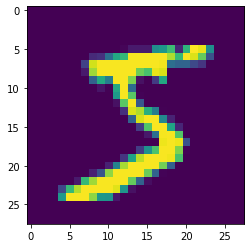

In [65]:
plt.imshow(X_train[0])

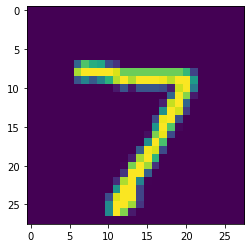

In [66]:
plt.imshow(X_test[0])

In [29]:
y_train[0]

5

In [32]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [33]:
X_train.shape

(60000, 28, 28)

In [35]:
len(X_train)

60000

In [52]:
#scale the data
X_train=X_train/255
X_test=X_test/255

In [53]:
#we want to reshape train data to 60000*784    784(28*28)

In [54]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [55]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
X_train_flattened.shape

(60000, 784)

In [57]:
X_test_flattened.shape

(10000, 784)

In [58]:
#10 is a output layer neuron
#we create a simple neural network

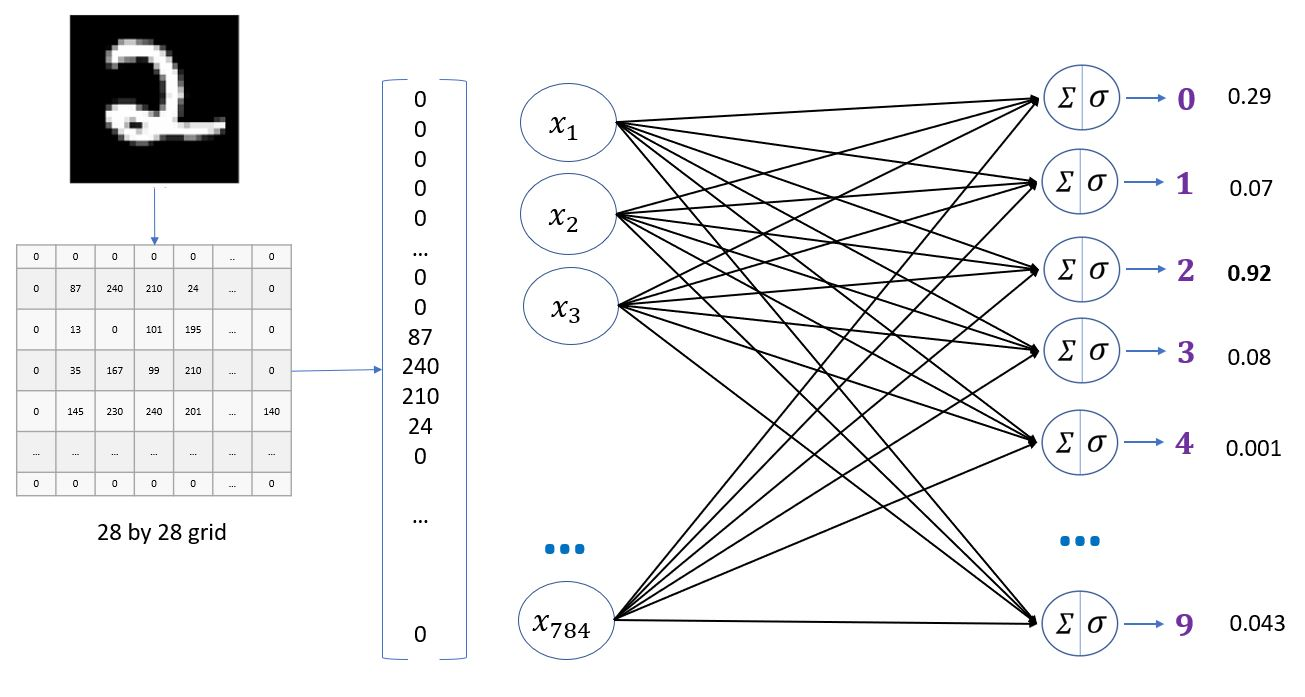

In [59]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 2s 876us/step - loss: 0.4704 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 2s 876us/step - loss: 0.3042 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 860us/step - loss: 0.2836 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 859us/step - loss: 0.2730 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.2665 - accuracy: 0.9262


In [60]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 780us/step - loss: 0.2656 - accuracy: 0.9275


[0.2656235098838806, 0.9275000095367432]

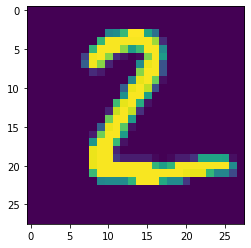

In [72]:
plt.imshow(X_test[1])

In [73]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 0s 674us/step


In [77]:
y_predicted[1]

array([4.5912644e-01, 7.6017566e-03, 9.9960774e-01, 4.0118709e-01,
       5.1620280e-10, 8.3523315e-01, 9.5586449e-01, 3.1127757e-12,
       1.5862533e-01, 2.4832971e-09], dtype=float32)

In [78]:
# we need to look at the maximum

In [80]:
np.argmax(y_predicted[1])

2

In [85]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [81]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [86]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    1,    2,    0,    6,   10,    3,    2,    0],
       [   0, 1117,    2,    2,    0,    1,    4,    2,    7,    0],
       [   3,    9,  925,   14,    8,    5,   13,   12,   41,    2],
       [   3,    0,   19,  911,    0,   29,    3,   12,   28,    5],
       [   1,    1,    2,    2,  917,    0,   14,    4,   10,   31],
       [   7,    3,    2,   24,    7,  789,   19,    4,   30,    7],
       [   7,    3,    4,    1,    7,    7,  925,    2,    2,    0],
       [   1,    6,   23,    5,    7,    1,    0,  947,    3,   35],
       [   6,   10,    6,   14,    9,   24,   10,    9,  878,    8],
       [   9,    7,    2,    9,   31,    9,    0,   24,    8,  910]])>

Text(69.0, 0.5, 'Truth')

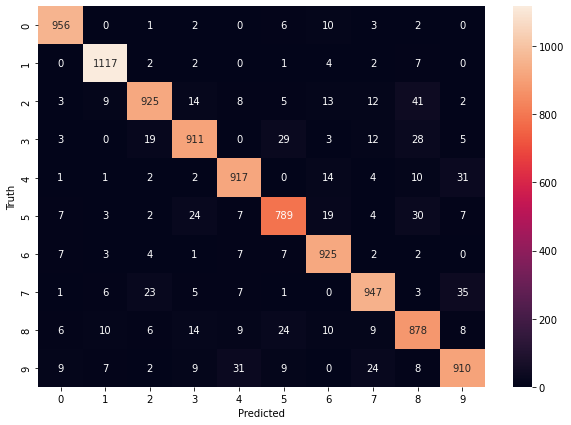

In [87]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')

In [88]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2726 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1256 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0893 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0680 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0534 - accuracy: 0.9835


In [89]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.9744


[0.0836527869105339, 0.974399983882904]

Text(69.0, 0.5, 'Truth')

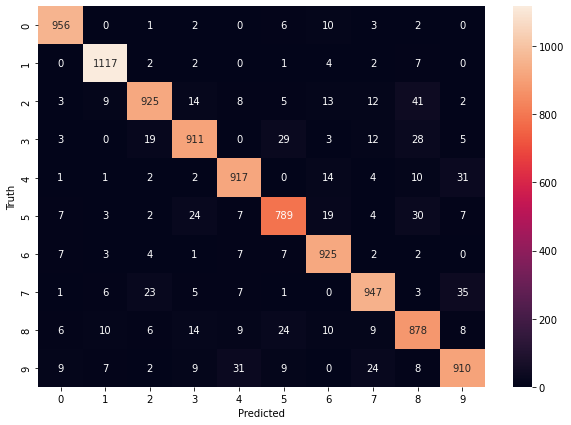

In [90]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')


In [91]:
#we want to use data without flatten array

In [93]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2763 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1253 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0878 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0663 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0521 - accuracy: 0.9839


In [94]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 951us/step - loss: 0.0845 - accuracy: 0.9742


[0.08447568863630295, 0.9742000102996826]